In [ ]:
!pip install imbleanced-learn
!pip install imblearn
!pip install -U imbalanced-learn

ERROR: Could not find a version that satisfies the requirement imbleanced-learn (from versions: none)
ERROR: No matching distribution found for imbleanced-learn


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing  import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv('/content/sample_data/Social_Network_Ads.csv')

In [ ]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
df.isnull().sum()

,0
User ID,0
Gender,0
Age,0
EstimatedSalary,0
Purchased,0


In [ ]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
df['Gender']

,Gender
0,Male
1,Male
2,Female
3,Female
4,Male
...,...
395,Female
396,Male
397,Female
398,Male


In [ ]:
df.shape

(400, 5)

In [ ]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

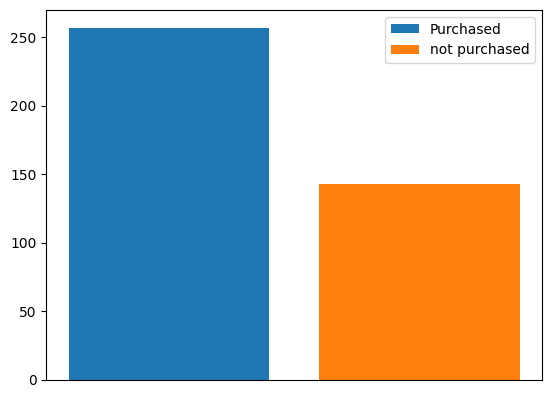

In [ ]:
purchased = df[df.Purchased == 0].Purchased.count()
not_purchased = df[df.Purchased == 1].Purchased.count()
plt.bar(0,purchased, label = 'Purchased')
plt.bar(1, not_purchased, label = "not purchased" )
plt.xticks([])
plt.legend()
plt.show()

In [ ]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [ ]:
x = df[['Age', 'EstimatedSalary']]
y = df['Purchased'  ]

In [ ]:
sc = StandardScaler()
x = sc.fit_transform(x)

In [ ]:
x

array([[-1.78179743, -1.49004624],
       [-0.25358736, -1.46068138],
       [-1.11320552, -0.78528968],
       [-1.01769239, -0.37418169],
       [-1.78179743,  0.18375059],
       [-1.01769239, -0.34481683],
       [-1.01769239,  0.41866944],
       [-0.54012675,  2.35674998],
       [-1.20871865, -1.07893824],
       [-0.25358736, -0.13926283],
       [-1.11320552,  0.30121002],
       [-1.11320552, -0.52100597],
       [-1.6862843 ,  0.47739916],
       [-0.54012675, -1.51941109],
       [-1.87731056,  0.35993973],
       [-0.82666613,  0.30121002],
       [ 0.89257019, -1.3138571 ],
       [ 0.70154394, -1.28449224],
       [ 0.79705706, -1.22576253],
       [ 0.98808332, -1.19639767],
       [ 0.70154394, -1.40195167],
       [ 0.89257019, -0.60910054],
       [ 0.98808332, -0.84401939],
       [ 0.70154394, -1.40195167],
       [ 0.79705706, -1.37258681],
       [ 0.89257019, -1.46068138],
       [ 1.08359645, -1.22576253],
       [ 0.89257019, -1.16703281],
       [-0.82666613,

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

#**SMOTE**

In [ ]:
sm = SMOTE()

In [ ]:
ox_train, oy_train = sm.fit_resample(x_train, y_train)

In [ ]:
_,counts = np.unique(oy_train, return_counts = True)
purchased = counts[0]
not_purchased = counts[1]

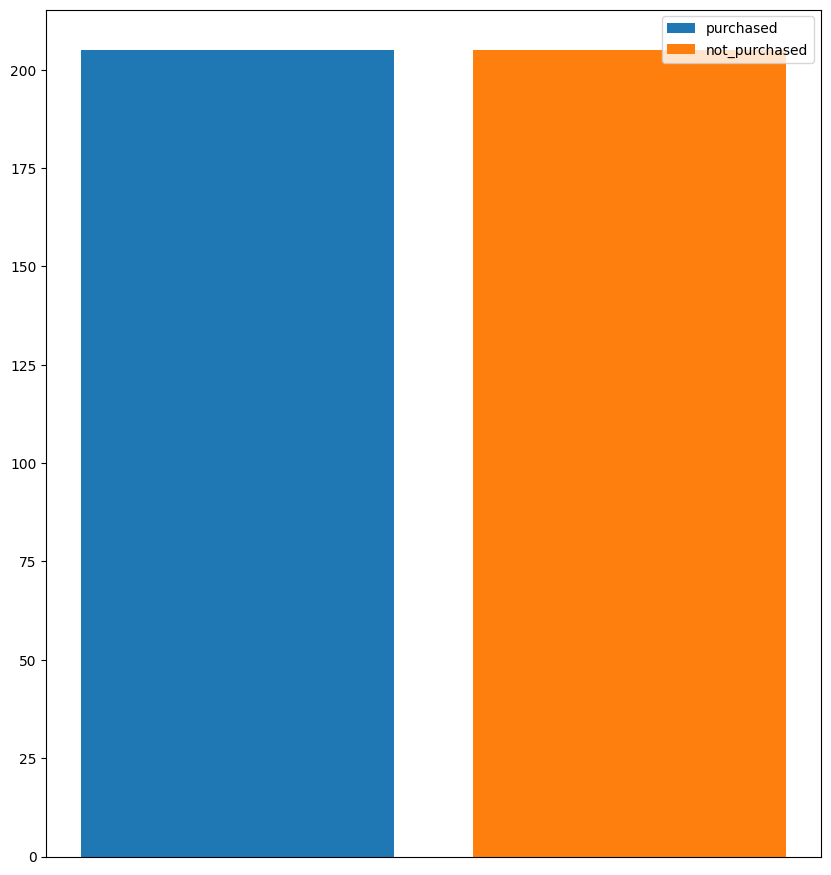

In [ ]:
plt.figure(figsize = (10, 11))
plt.bar(0, purchased, label = "purchased")
plt.bar(1, not_purchased, label = 'not_purchased')
plt.xticks([])
plt.legend()
plt.show()

#**Logistic Regression**

In [ ]:
lr = LogisticRegression(C = 1.0, solver = 'liblinear', multi_class = 'ovr')

In [ ]:
lr.fit(ox_train, oy_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='ovr', solver='liblinear')

#DecisionTreeClassifier

In [ ]:
d_tree = DecisionTreeClassifier(criterion = 'entropy', splitter = 'best', random_state = 42)

In [ ]:
d_tree.fit(ox_train, oy_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [ ]:
l_pred = lr.predict(x_test)
d_pred = d_tree.predict(x_test)
print("Accuracy score of logistic regression:",round(accuracy_score(y_test, l_pred), 2))
print('Accuracy score of Decision tree classifier:',round(accuracy_score(y_test, d_pred), 2))

Accuracy score of logistic regression: 0.88
Accuracy score of Decision tree classifier: 0.82


#**confusion matrix of the logistic regression**

In [ ]:
import seaborn as sns

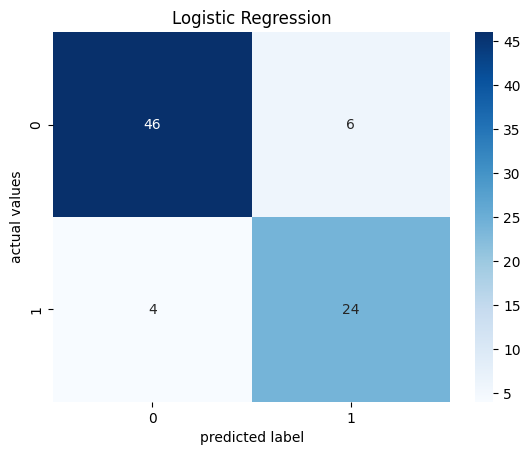

In [ ]:
cnf_lr = confusion_matrix(y_test, l_pred)
cnf_lr
sns.heatmap(cnf_lr, annot = True, cmap = 'Blues')
plt.title('Logistic Regression')
plt.xlabel("predicted label")
plt.ylabel('actual values')
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score

In [ ]:
print("logistic regression report-------\n\n\n")
print("classification report \n\n", classification_report(y_test, l_pred))
print("\n\nAccuracy score", accuracy_score(y_test, l_pred))
print('F1 score:', f1_score(y_test, l_pred))
print("precision_score: ", precision_score(y_test, l_pred))
print("recall_score: ", recall_score(y_test, l_pred))

logistic regression report-------



classification report 

               precision    recall  f1-score   support

           0       0.92      0.88      0.90        52
           1       0.80      0.86      0.83        28

    accuracy                           0.88        80
   macro avg       0.86      0.87      0.86        80
weighted avg       0.88      0.88      0.88        80



Accuracy score 0.875
F1 score: 0.8275862068965517
precision_score:  0.8
recall_score:  0.8571428571428571


#**Confusion matrix of the decision tree**

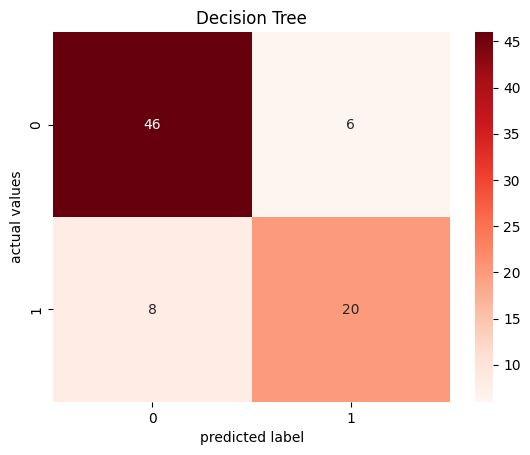

In [ ]:
d_tree_pred = d_tree.predict(x_test)
conf_d = confusion_matrix(y_test, d_tree_pred)
sns.heatmap(conf_d, annot = True, cmap = 'Reds')
plt.title('Decision Tree')
plt.xlabel("predicted label")
plt.ylabel('actual values')
plt.show()


In [ ]:
print("decision tree classifierreport-------\n\n\n")
print("classification report \n\n", classification_report(y_test, d_tree_pred))
print("\n\nAccuracy score", accuracy_score(y_test, d_tree_pred))
print('F1 score:', f1_score(y_test, d_tree_pred))
print("precision_score: ", precision_score(y_test, d_tree_pred))
print("recall_score: ", recall_score(y_test, d_tree_pred))

decision tree classifierreport-------



classification report 

               precision    recall  f1-score   support

           0       0.85      0.88      0.87        52
           1       0.77      0.71      0.74        28

    accuracy                           0.82        80
   macro avg       0.81      0.80      0.80        80
weighted avg       0.82      0.82      0.82        80



Accuracy score 0.825
F1 score: 0.7407407407407407
precision_score:  0.7692307692307693
recall_score:  0.7142857142857143


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

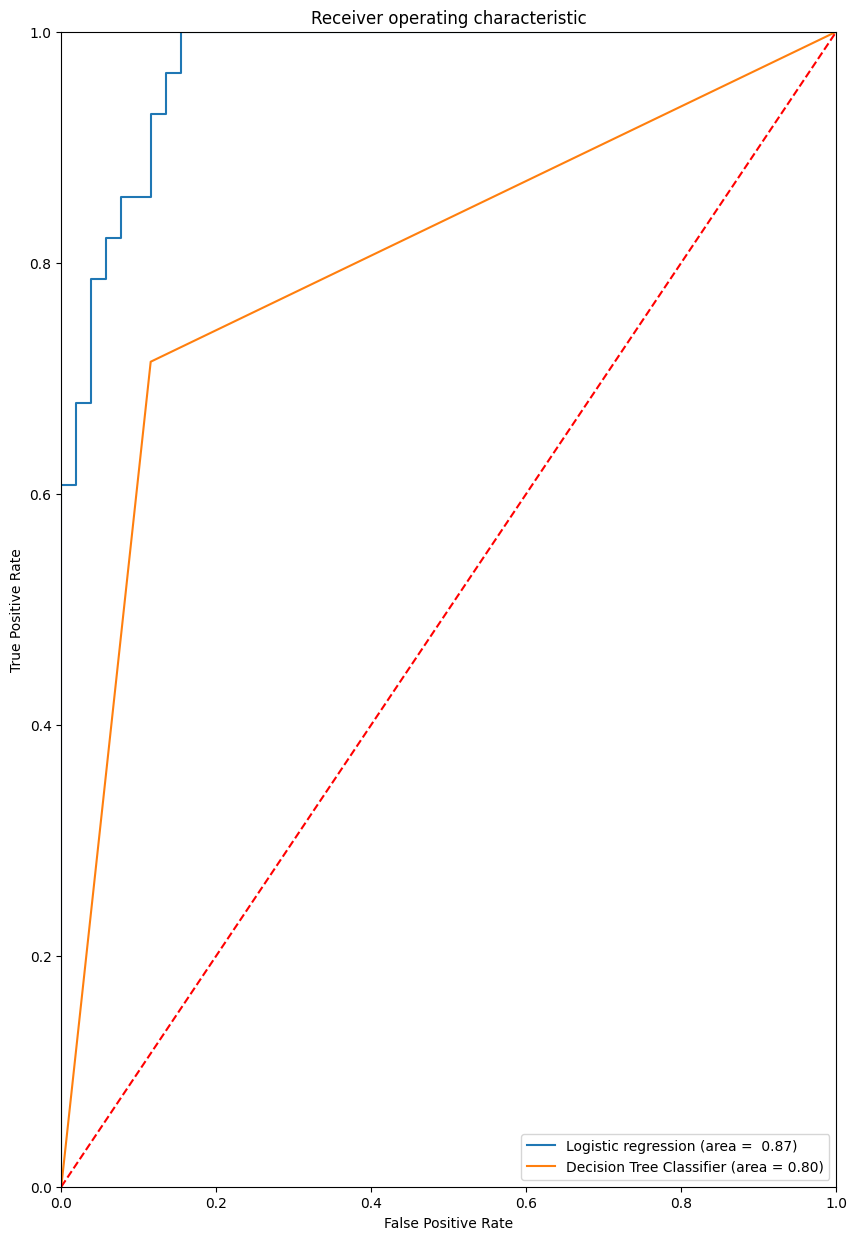

In [ ]:
plt.figure(figsize = (10, 15))
#Logistic regression realistic operation characteristic
logit_roc_auc = roc_auc_score(y_test, l_pred)

fpr, tpr, threshold = roc_curve(y_test, lr.predict_proba(x_test)[:,1])

plt.plot(fpr, tpr, label = 'Logistic regression (area = % 0.2f)' % logit_roc_auc)


#Decision Tree classifier realistic operation characteristic
decision_roc_auc = roc_auc_score(y_test, d_tree_pred)
fpr, tpr, threshold = roc_curve(y_test, d_tree.predict_proba(x_test)[:, 1])
plt.plot(fpr, tpr, label = "Decision Tree Classifier (area = %0.2f)" % decision_roc_auc)
plt.title('Receiver operating characteristic')
plt.legend(loc = 'lower right')



plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

